In [ ]:
#주석풀고 설치해주면 colab에서 geopandas가 돌아갑니다!

'''import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes'''

## 주피터 사용할 때는 colab 기능 삭제하고, 주석처리 부분 풀면 됩니다!

In [ ]:
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import descartes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/compas2020/data

/content/drive/My Drive/compas2020/data


In [ ]:
#file_path = 'gwangyang/data'
#p = pathlib.Path(file_path)

In [ ]:
#chargingStation = pd.read_csv(p.joinpath('01.광양시_충전기설치현황.csv'))

chargingStation = pd.read_csv('01.광양시_충전기설치현황.csv')
chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057


In [ ]:
chargingStation['lon'] = chargingStation['lon'].astype(float)
chargingStation['lat'] = chargingStation['lat'].astype(float)
chargingStation['geometry'] = chargingStation.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
chargingStation = gpd.GeoDataFrame(chargingStation, geometry='geometry')

chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat,geometry
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002,POINT (127.56830 34.96300)
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334,POINT (127.58332 34.98033)
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759,POINT (127.68901 34.95376)
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032,POINT (127.71671 34.96403)
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444,POINT (127.73244 34.94044)
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334,POINT (127.58244 34.96333)
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506,POINT (127.75098 34.96251)
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198,POINT (127.76007 34.94120)
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147,POINT (127.72513 34.96215)
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057,POINT (127.58061 34.97306)


In [ ]:
#parkingLot = pd.read_csv(p.joinpath('02.광양시_주차장_공간정보.csv'))

parkingLot = pd.read_csv('02.광양시_주차장_공간정보.csv')
parkingLot


,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523
...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388


In [ ]:
parkingLot['lon'] = parkingLot['lon'].astype(float)
parkingLot['lat'] = parkingLot['lat'].astype(float)
parkingLot['geometry'] = parkingLot.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
parkingLot = gpd.GeoDataFrame(parkingLot, geometry='geometry')

parkingLot

,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat,geometry
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324,POINT (127.58688 34.97032)
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252,POINT (127.69543 34.93625)
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637,POINT (127.58459 34.97564)
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130,POINT (127.58068 34.97013)
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523,POINT (127.58071 34.97252)
...,...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214,POINT (127.60482 35.07921)
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673,POINT (127.61342 35.07067)
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759,POINT (127.61177 35.00276)
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388,POINT (127.67472 35.09239)


In [ ]:
#campsite = pd.read_csv(p.joinpath('05.광양시_대중집합시설_야영장.csv'))

campsite = pd.read_csv('05.광양시_대중집합시설_야영장.csv')
campsite

,명칭,주소,소유주체(공공/민간),lon,lat
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226


In [ ]:
campsite['lon'] = campsite['lon'].astype(float)
campsite['lat'] = campsite['lat'].astype(float)
campsite['geometry'] = campsite.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
campsite = gpd.GeoDataFrame(campsite, geometry='geometry')
campsite

,명칭,주소,소유주체(공공/민간),lon,lat,geometry
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566,POINT (127.60179 35.09657)
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546,POINT (127.71085 35.06055)
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553,POINT (127.63156 35.06955)
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193,POINT (127.56249 35.07619)
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216,POINT (127.59118 35.05422)
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226,POINT (127.58164 35.00523)


In [ ]:
#gyboundary = gpd.read_file(p.joinpath('20.광양시_행정경계(읍면동).geojson'))

gyboundary = gpd.read_file('20.광양시_행정경계(읍면동).geojson')
gyboundary

,ADM_DR_CD,ADM_DR_NM,geometry
0,3606031,봉강면,"MULTIPOLYGON (((127.58037 35.10902, 127.58052 ..."
1,3606032,옥룡면,"MULTIPOLYGON (((127.59872 35.12006, 127.59919 ..."
2,3606033,옥곡면,"MULTIPOLYGON (((127.64878 35.03547, 127.64902 ..."
3,3606034,진상면,"MULTIPOLYGON (((127.65639 35.11680, 127.65698 ..."
4,3606035,진월면,"MULTIPOLYGON (((127.75715 35.05502, 127.75716 ..."
5,3606036,다압면,"MULTIPOLYGON (((127.64117 35.16850, 127.64140 ..."
6,3606051,골약동,"MULTIPOLYGON (((127.68056 34.92848, 127.68105 ..."
7,3606053,중마동,"MULTIPOLYGON (((127.70376 34.96198, 127.70542 ..."
8,3606054,광영동,"MULTIPOLYGON (((127.71676 34.96939, 127.71691 ..."
9,3606055,태인동,"MULTIPOLYGON (((127.76162 34.95988, 127.76163 ..."


In [ ]:
print(gyboundary.crs)

epsg:4326


In [ ]:
chargingStation.crs = {'init':'epsg:4326'}
print(chargingStation.crs)

+init=epsg:4326 +type=crs


In [ ]:
parkingLot.crs = {'init':'epsg:4326'}
print(parkingLot.crs)

+init=epsg:4326 +type=crs


In [ ]:
campsite.crs = {'init':'epsg:4326'}
print(campsite.crs)

+init=epsg:4326 +type=crs


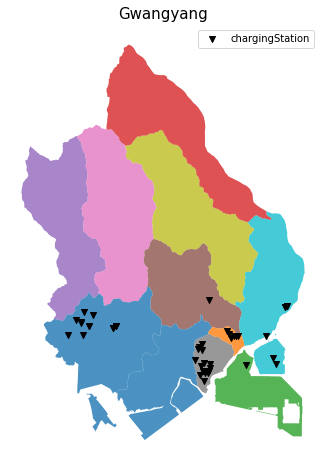

In [ ]:
#충전소

ax0 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
chargingStation.plot(ax=ax0, marker='v', color='black', label='chargingStation')
ax0.set_title("Gwangyang", fontsize=15)
ax0.set_axis_off()
plt.legend()
plt.show()

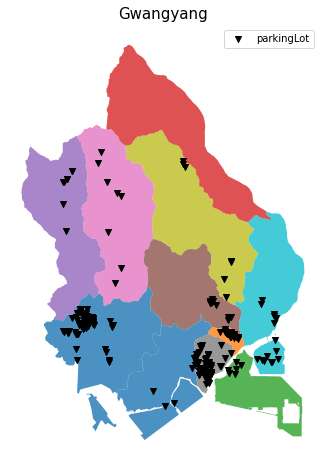

In [ ]:
#주차장 

ax1 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
parkingLot.plot(ax=ax1, marker='v', color='black', label='parkingLot')
ax1.set_title("Gwangyang", fontsize=15)
ax1.set_axis_off()
plt.legend()
plt.show()

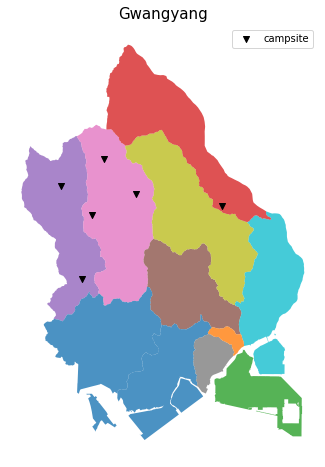

In [ ]:
#야영지

ax2 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
campsite.plot(ax=ax2, marker='v', color='black', label='campsite')
ax2.set_title("Gwangyang", fontsize=15)
ax2.set_axis_off()
plt.legend()
plt.show()

In [ ]:
chslist = []
for i in range(len(chargingStation.geometry)):
    for j in range(len(gyboundary.geometry)):
        if chargingStation.geometry[i].within(gyboundary.geometry[j]) == True:
            chslist.append(gyboundary.ADM_DR_NM[j])
            
pllist = []
for i in range(len(parkingLot.geometry)):
    for j in range(len(gyboundary.geometry)):
        if parkingLot.geometry[i].within(gyboundary.geometry[j]) == True:
            pllist.append(gyboundary.ADM_DR_NM[j])
            
cslist = []
for i in range(len(campsite.geometry)):
    for j in range(len(gyboundary.geometry)):
        if campsite.geometry[i].within(gyboundary.geometry[j]) == True:
            cslist.append(gyboundary.ADM_DR_NM[j])
            
#print(chslist)
#print(pllist)
#print(cslist)

In [ ]:
chargingStation['administration'] = chslist
chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat,geometry,administration
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002,POINT (127.56830 34.96300),광양읍
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334,POINT (127.58332 34.98033),광양읍
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759,POINT (127.68901 34.95376),중마동
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032,POINT (127.71671 34.96403),광영동
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444,POINT (127.73244 34.94044),금호동
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334,POINT (127.58244 34.96333),광양읍
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506,POINT (127.75098 34.96251),진월면
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198,POINT (127.76007 34.94120),태인동
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147,POINT (127.72513 34.96215),광영동
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057,POINT (127.58061 34.97306),광양읍


In [ ]:
parkingLot['administration'] = pllist
parkingLot

,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat,geometry,administration
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324,POINT (127.58688 34.97032),광양읍
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252,POINT (127.69543 34.93625),중마동
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637,POINT (127.58459 34.97564),광양읍
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130,POINT (127.58068 34.97013),광양읍
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523,POINT (127.58071 34.97252),광양읍
...,...,...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214,POINT (127.60482 35.07921),옥룡면
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673,POINT (127.61342 35.07067),옥룡면
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759,POINT (127.61177 35.00276),옥룡면
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388,POINT (127.67472 35.09239),진상면


In [ ]:
campsite['administration'] = cslist
campsite

,명칭,주소,소유주체(공공/민간),lon,lat,geometry,administration
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566,POINT (127.60179 35.09657),옥룡면
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546,POINT (127.71085 35.06055),다압면
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553,POINT (127.63156 35.06955),옥룡면
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193,POINT (127.56249 35.07619),봉강면
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216,POINT (127.59118 35.05422),옥룡면
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226,POINT (127.58164 35.00523),봉강면
